**Dansk Industri - Case 3**

In [10]:
# Importer relevante pakker
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # Add-on toolkit for plt
import re
# printe i Notebook
%matplotlib inline 

In [11]:
## Importer data
df1 = pd.read_excel('Bilag_5.xlsx', sheet_name='Medlemmer 2020')

In [12]:
#Omdøbe og summe antal af branchefælleskaber
df1.rename(columns={'DI antal ansatte opgivet':'Antal_ansatte'}, inplace=True)
df1['BF_total']=df1[[col for col in df1.columns if col.startswith('DI ')]].sum(axis=1)

In [13]:
#Drop antal ansatte>500
df1 = df1[df1['Antal_ansatte']<500]

In [14]:
df1.rename(columns={'Unnamed: 25':'Generel_tilfredshed'}, inplace=True)

In [15]:
df_A_temp=df1[df1['Generel_tilfredshed']!='Ikke besvaret' ]
df_A_temp1=df_A_temp[df_A_temp['Generel_tilfredshed']!='Mangler']#Vi frasorterer dem, som ikke har svaret
df_A_temp

,ID,Virk postnr,Virk postdistrikt,Medlemsstatus,Medlemstype,Antal_ansatte,Branche kode,Virk region,Virk land,DI Byg,...,Træ- og Møbelindustrien,ATL - Transportens Arbejdsgivere,Mejeribrugets Arbejdsgiverforening,DI Dansk Byggeri,Brug,DI indmeldelsesdato,Har besvaret MTU2020,Generel_tilfredshed,Har besvaret NPM2020,BF_total
138,139,2300,København S,HOF,MEDLEM,470,10.81.00,Region Hovedstaden,Danmark,0,...,0,0,0,0,Meget brug,1901-01-01,Ja,9,Nej,1
140,141,2640,Hedehusene,HOF,MEDLEM,464,38.11.00,Region Hovedstaden,Danmark,0,...,0,0,0,0,Meget brug,2004-01-01,Ja,8,Nej,2
142,143,5300,Kerteminde,HOF,MEDLEM,452,28.30.00,Region Syddanmark,Danmark,0,...,0,0,0,0,Meget brug,1940-10-01,Ja,8,Nej,0
144,145,2300,København S,HOF,MEDLEM,444,23.62.00,Region Hovedstaden,Danmark,1,...,0,0,0,0,Meget brug,2016-01-01,Ja,9,Nej,3
145,146,2850,Nærum,HOF,MEDLEM,439,26.51.00,Region Hovedstaden,Danmark,0,...,0,0,0,0,Meget brug,1977-07-01,Ja,9,Nej,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6575,6576,4200,Slagelse,HOF,ASSO,0,70.22.00,Region Sjælland,Danmark,0,...,0,0,0,0,Lidt brug,2019-10-01,Ja,9,Nej,1
6576,6577,4000,Roskilde,HOF,ASSO,0,70.22.00,Region Sjælland,Danmark,0,...,0,0,0,0,Meget brug,2020-04-01,Ja,8,Nej,1
6581,6582,2720,Vanløse,HOF,ASSO,0,62.02.00,Region Hovedstaden,Danmark,0,...,0,0,0,0,Meget brug,2019-10-01,Ja,7,Nej,2
6583,6584,2950,Vedbæk,HOF,ASSO,0,46.46.20,Region Hovedstaden,Danmark,0,...,0,0,0,0,Intet brug,2020-07-01,Ja,10 Meget tilfreds,Nej,0


Text(0.5, 0.98, 'Brug af DI ydelser')

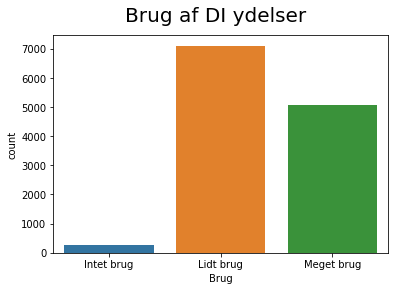

In [16]:
ax = sns.countplot(x="Brug", data=df1, order=['Intet brug', 'Lidt brug', 'Meget brug'])
plt.suptitle("Brug af DI ydelser", size=20)

In [17]:
#Først er i vi interesseret i det segment der var under middel i tilfredshed


#Vi kigger på dem som har svaret mindre end 5 i tilfredshed
df_A0=df1[df1['Generel_tilfredshed']=='0 Meget utilfreds']
df_A0_temp1=df_A0['Generel_tilfredshed'].astype('string')
df_A0['Generel_tilfredshed']=df_A0_temp1.str.extract('(\d+)')
df_A1=df1[df1['Generel_tilfredshed']==1]
df_A2=df1[df1['Generel_tilfredshed']==2]
df_A3=df1[df1['Generel_tilfredshed']==3]
df_A4=df1[df1['Generel_tilfredshed']==4]
#Vi samler alle dem som har generel tilfredshed under 5
df_A=df_A0.append([df_A1, df_A2, df_A3, df_A4], sort=False)

#Laver generel tilfredshed til integer
df_A['Generel_tilfredshed']=df_A.Generel_tilfredshed.astype(int)

/Users/jeppeleo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [40]:
#Antal som besvaret spørgeskemaet og giver generel tilfredshed under middel, <5
df_A.describe()

,ID,Antal_ansatte,DI Byg,DI Energi,DI Fødevarer,DI Handel,DI Digital,DI Service,DI Rådgiverne,DI Transport,Bilbranchen,Træ- og Møbelindustrien,ATL - Transportens Arbejdsgivere,Mejeribrugets Arbejdsgiverforening,DI Dansk Byggeri,Generel_tilfredshed,BF_total
count,74.000000,74.000000,74.0,74.000000,74.0,74.000000,74.000000,74.000000,74.000000,74.000000,74.0,74.000000,74.000000,74.0,74.0,74.000000,74.000000
mean,3832.432432,28.972973,0.0,0.013514,0.0,0.108108,0.027027,0.013514,0.067568,0.162162,0.0,0.027027,0.081081,0.0,0.0,2.918919,0.391892
std,1969.278890,44.700211,0.0,0.116248,0.0,0.312636,0.163269,0.116248,0.252716,0.371116,0.0,0.163269,0.274823,0.0,0.0,1.143855,0.592593
min,449.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,2440.750000,2.250000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,2.000000,0.000000
50%,3748.500000,11.500000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,3.000000,0.000000
75%,5698.250000,25.750000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,4.000000,1.000000
max,6526.000000,181.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,4.000000,2.000000


Text(0.5, 0.98, 'Brug af DI ydelser og tilfredshed')

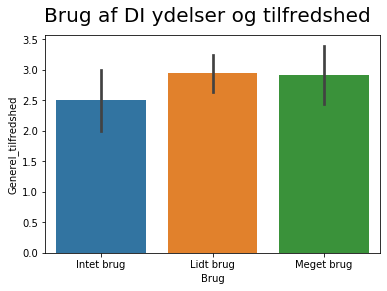

In [18]:
#Vi ser på, hvordan den utilfredse gruppe bruger DI ydelser
#ax = sns.countplot(x="Brug", data=df_A, order=['Intet brug', 'Lidt brug', 'Meget brug'])
sns.barplot(x='Brug', y='Generel_tilfredshed', data=df_A, order=['Intet brug', 'Lidt brug', 'Meget brug']) 
plt.suptitle("Brug af DI ydelser og tilfredshed", size=20)

In [19]:
df_A.describe()

,ID,Antal_ansatte,DI Byg,DI Energi,DI Fødevarer,DI Handel,DI Digital,DI Service,DI Rådgiverne,DI Transport,Bilbranchen,Træ- og Møbelindustrien,ATL - Transportens Arbejdsgivere,Mejeribrugets Arbejdsgiverforening,DI Dansk Byggeri,Generel_tilfredshed,BF_total
count,74.000000,74.000000,74.0,74.000000,74.0,74.000000,74.000000,74.000000,74.000000,74.000000,74.0,74.000000,74.000000,74.0,74.0,74.000000,74.000000
mean,3832.432432,28.972973,0.0,0.013514,0.0,0.108108,0.027027,0.013514,0.067568,0.162162,0.0,0.027027,0.081081,0.0,0.0,2.918919,0.391892
std,1969.278890,44.700211,0.0,0.116248,0.0,0.312636,0.163269,0.116248,0.252716,0.371116,0.0,0.163269,0.274823,0.0,0.0,1.143855,0.592593
min,449.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,2440.750000,2.250000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,2.000000,0.000000
50%,3748.500000,11.500000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,3.000000,0.000000
75%,5698.250000,25.750000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,4.000000,1.000000
max,6526.000000,181.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,4.000000,2.000000


In [20]:
df1['BF_total'].describe()

count    12427.000000
mean         0.941337
std          0.754099
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: BF_total, dtype: float64

(array([3645., 6124., 2414.,  232.,   12.]),
 array([0., 1., 2., 3., 4., 5.]),
 <a list of 5 Patch objects>)

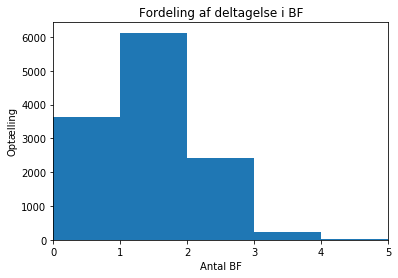

In [21]:
props = {
    'title': 'Fordeling af deltagelse i BF',
    'xlabel': 'Antal BF',
    'ylabel': 'Optælling',
    'xlim': [0, 5]
}


fig, ax = plt.subplots()
ax.set(**props)
ax.hist(df1.BF_total, bins=5)

Text(0.5, 0.98, 'Antal branchefællesskaber og brug af DI ydelser')

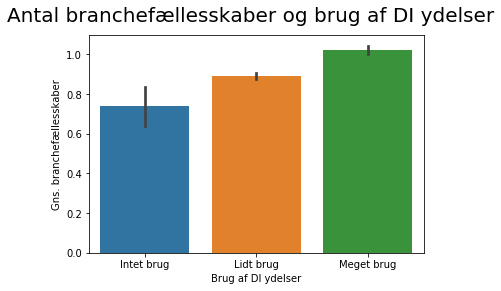

In [22]:
sns.barplot(x='Brug', y='BF_total', data=df1, order=['Intet brug', 'Lidt brug', 'Meget brug']) 
plt.ylabel('Gns. branchefællesskaber')
plt.xlabel('Brug af DI ydelser')
plt.suptitle("Antal branchefællesskaber og brug af DI ydelser", size=20)

In [23]:
#Erstatter tomme celler med nan 
df1.replace(r'^\s*$', np.nan, regex=True)
#Indsæt Nej i manglende besvarelse
df1['Har besvaret NPM2020'] = df1['Har besvaret NPM2020'].fillna('Nej')
#Indsæt nan i besvarelsen for 'Har besvaret NPM2020', hvis de ikke er medlem af DI Dansk Byggeri
df1.loc[df1['DI Dansk Byggeri'] == 0 , ['Har besvaret NPM2020']] = np.nan
df1['Har besvaret NPM2020']

132      NaN
133      NaN
134      NaN
135      NaN
136      NaN
        ... 
12576    Nej
12577    Nej
12578    Nej
12579    Nej
12580    Nej
Name: Har besvaret NPM2020, Length: 12427, dtype: object

Text(0.5, 0.98, 'Antal branchefællesskaber og besvarelser')

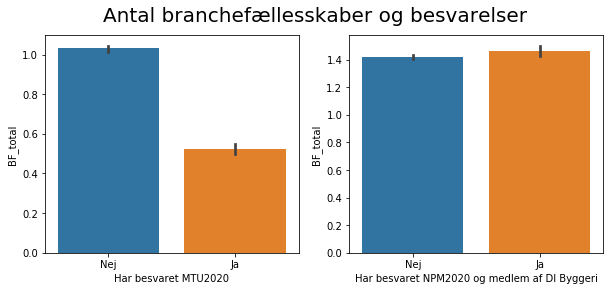

In [24]:
f,ax = plt.subplots(1,2, figsize=(10,4))
sns.barplot(x='Har besvaret MTU2020', y='BF_total', data=df1, ax=ax[0], order=['Nej', 'Ja']) 
sns.barplot(x='Har besvaret NPM2020', y='BF_total', data=df1, ax=ax[1], order=['Nej', 'Ja']) 
plt.xlabel('Har besvaret NPM2020 og medlem af DI Byggeri')
plt.suptitle("Antal branchefællesskaber og besvarelser", size=20)

In [25]:
#Besvaret enten MTU2020 eller NPM2020. Da vi antager at besvarelse i en af dem viser den generelle kontakt
def f(row):
    if row['Har besvaret MTU2020'] == 'Ja':
        val = 'Ja'
    elif row['Har besvaret NPM2020'] == 'Ja':
        val = 'Ja'
    else:
        val = 'Nej'
    return val
df1['Besvaret'] = df1.apply(f, axis=1)

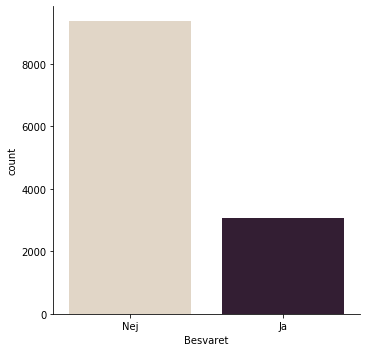

In [26]:
sns.catplot(x='Besvaret', kind="count", palette="ch:.25", data=df1, order=['Nej', 'Ja'])

Text(0.5, 0.98, 'Antal branchefællesskaber og besvarelse')

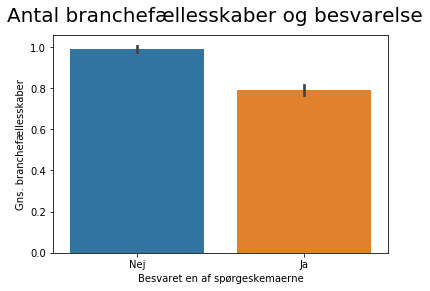

In [27]:
sns.barplot(x='Besvaret', y='BF_total', data=df1, order=['Nej', 'Ja']) 
plt.ylabel('Gns. branchefællesskaber')
plt.xlabel('Besvaret en af spørgeskemaerne')
plt.suptitle("Antal branchefællesskaber og besvarelse", size=20)

In [28]:
#VÆK? Gruppering i antal branchefælleskaber. Mere end to antages for aktiv
def g(row):
    if row['BF_total'] > 1:
        val = 1
    else:
        val = 0
    return val
df1['Aktiv_bf'] = df1.apply(g, axis=1)

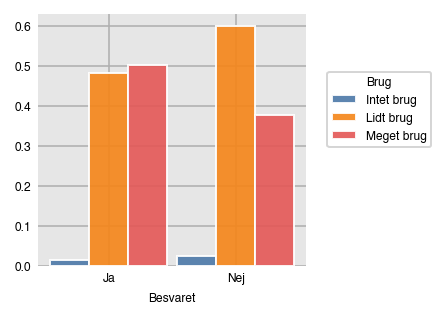

In [29]:
#!pip install dexplot
import dexplot as dxp

dxp.count('Besvaret', data=df1, split='Brug', normalize='Besvaret')


In [30]:
#Segment B. Dem som ikke har besvaret og ikke bruger ydelser

def n(row):
    if row['Besvaret'] =="Nej" and row['Brug']=='Intet brug':
        val1 = 1
        
        return val1
    
df1['SegmentB'] = df1.apply(n, axis=1)
df_segmentB = df1[df1['SegmentB']==1]
df_segmentB.describe()

,ID,Antal_ansatte,DI Byg,DI Energi,DI Fødevarer,DI Handel,DI Digital,DI Service,DI Rådgiverne,DI Transport,Bilbranchen,Træ- og Møbelindustrien,ATL - Transportens Arbejdsgivere,Mejeribrugets Arbejdsgiverforening,DI Dansk Byggeri,BF_total,Aktiv_bf,SegmentB
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.0
mean,7514.259091,14.836364,0.018182,0.009091,0.004545,0.050000,0.059091,0.036364,0.090909,0.081818,0.027273,0.018182,0.045455,0.013636,0.377273,0.727273,0.190909,1.0
std,3225.807867,40.443890,0.133913,0.095128,0.067420,0.218442,0.236333,0.187620,0.288135,0.274713,0.163248,0.133913,0.208774,0.116240,0.485809,0.821059,0.393914,0.0
min,156.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,5289.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,6374.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
75%,11056.500000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0
max,12560.000000,421.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.0


In [31]:
#Segment C, hvor der er ingen besvarelse og har brugt lidt og er medlemsskab i 0 branchefællesskaber

def k(row):
    if row['Besvaret'] =="Nej" and row['Brug']=='Lidt brug':
        val1 = 1
        
        return val1
    


In [32]:
df1['SegmentC'] = df1.apply(k, axis=1)
df_segmentC = df1[df1['SegmentC']==1]
df_segmentC.describe()

,ID,Antal_ansatte,DI Byg,DI Energi,DI Fødevarer,DI Handel,DI Digital,DI Service,DI Rådgiverne,DI Transport,Bilbranchen,Træ- og Møbelindustrien,ATL - Transportens Arbejdsgivere,Mejeribrugets Arbejdsgiverforening,DI Dansk Byggeri,BF_total,Aktiv_bf,SegmentB,SegmentC
count,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,0.0,5625.0
mean,7315.470756,16.853511,0.032356,0.011022,0.011022,0.063111,0.056533,0.035022,0.065067,0.146844,0.064000,0.025067,0.092800,0.025244,0.502933,0.923911,0.203911,NaN,1.0
std,3414.719048,34.957313,0.176958,0.104416,0.104416,0.243184,0.230969,0.183852,0.246665,0.353982,0.244775,0.156342,0.290178,0.156881,0.500036,0.743324,0.402939,NaN,0.0
min,207.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.0
25%,4402.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.0
50%,7074.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,1.0
75%,10476.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,1.0
max,12580.000000,416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,NaN,1.0


In [34]:
def p(row):
    if row['BF_total']==0:
        val1 = 1
        
        return val1

In [35]:
df_segmentC['BF_01'] = df_segmentC.apply(p, axis=1)
df_segmentC = df_segmentC[df_segmentC['BF_01']==1]

/Users/jeppeleo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df_segmentC.describe()

,ID,Antal_ansatte,DI Byg,DI Energi,DI Fødevarer,DI Handel,DI Digital,DI Service,DI Rådgiverne,DI Transport,Bilbranchen,Træ- og Møbelindustrien,ATL - Transportens Arbejdsgivere,Mejeribrugets Arbejdsgiverforening,DI Dansk Byggeri,BF_total,Aktiv_bf,SegmentB,SegmentC,BF_01
count,1676.000000,1676.000000,1676.0,1676.0,1676.0,1676.0,1676.0,1676.0,1676.0,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.0,1676.0,0.0,1676.0,1676.0
mean,4173.683771,15.181981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064439,0.039976,0.036396,0.000597,0.0,0.0,0.0,NaN,1.0,1.0
std,1522.490100,21.871477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.245607,0.195962,0.187330,0.024427,0.0,0.0,0.0,NaN,0.0,0.0
min,291.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,1.0,1.0
25%,3068.500000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,1.0,1.0
50%,4302.500000,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,1.0,1.0
75%,5427.250000,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,1.0,1.0
max,6633.000000,263.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,NaN,1.0,1.0


(array([107.,  71.,   0.,  37.,   5.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. ]),
 <a list of 5 Patch objects>)

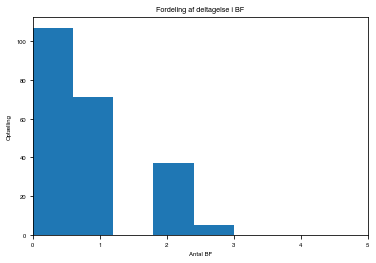

In [38]:
props = {
    'title': 'Fordeling af deltagelse i BF',
    'xlabel': 'Antal BF',
    'ylabel': 'Optælling',
    'xlim': [0, 5]
}


fig, ax = plt.subplots()
ax.set(**props)
ax.hist(df_segmentB.BF_total, bins=5)